In [1]:
!pip install -U yellowbrick
!pip install -U statsmodels

/home/akhil/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/akhil/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.13.1-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/home/akhil/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
Requirement already up-to-date: yellowbrick in /home/akhil/.local/lib/python3.8/site-packages (1.5)
/home/akhil/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/akhil/.local/lib/python3.8/site-packages/pkg_resources/__in

In [2]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

Exploring data

In [3]:
df = pd.read_csv('mcdonalds.csv')

In [4]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
df.shape

(1453, 15)

In [6]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [7]:
df.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [8]:
df.replace({'Yes': 1, 'No': 0}, inplace=True)
df.replace({'I hate it!-5': '-5','I love it!+5':'+5'}, inplace=True)
df[df.columns[:11]].mean(axis=0)

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64

In [9]:
pca = PCA(n_components=11)

df_pca = pca.fit_transform(df[df.columns[:11]])

Importance of components

In [10]:
stds = np.sqrt(pca.explained_variance_)
var_prop = pca.explained_variance_ratio_
cum_prop = np.cumsum(var_prop)

print('PCA Summary:')
for i in range(len(stds)):
    print('PC{}: Standard deviation: {:.5f},\nProportional variance: {:.5f},\nCumulative proportion: {:.5f}\n'.format(i+1, stds[i], var_prop[i], cum_prop[i]))

PCA Summary:
PC1: Standard deviation: 0.75705,
Proportional variance: 0.29945,
Cumulative proportion: 0.29945

PC2: Standard deviation: 0.60746,
Proportional variance: 0.19280,
Cumulative proportion: 0.49224

PC3: Standard deviation: 0.50462,
Proportional variance: 0.13305,
Cumulative proportion: 0.62529

PC4: Standard deviation: 0.39880,
Proportional variance: 0.08310,
Cumulative proportion: 0.70839

PC5: Standard deviation: 0.33741,
Proportional variance: 0.05948,
Cumulative proportion: 0.76787

PC6: Standard deviation: 0.31027,
Proportional variance: 0.05030,
Cumulative proportion: 0.81817

PC7: Standard deviation: 0.28970,
Proportional variance: 0.04385,
Cumulative proportion: 0.86201

PC8: Standard deviation: 0.27512,
Proportional variance: 0.03955,
Cumulative proportion: 0.90156

PC9: Standard deviation: 0.26525,
Proportional variance: 0.03676,
Cumulative proportion: 0.93832

PC10: Standard deviation: 0.24884,
Proportional variance: 0.03235,
Cumulative proportion: 0.97068

PC11: 

Factor loadings

In [11]:
pca_cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']

loadings_matrix = pd.DataFrame(pca.components_.T, columns=pca_cols, index=df.columns[:11])

print(loadings_matrix)

                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy      -0.476933  0.363790 -0.304444  0.055162 -0.307535  0.170738   
convenient -0.155332  0.016414 -0.062515 -0.142425  0.277608 -0.347830   
spicy      -0.006356  0.018809 -0.037019  0.197619  0.070620 -0.355087   
fattening   0.116232 -0.034094 -0.322359 -0.354139 -0.073405 -0.406515   
greasy      0.304443 -0.063839 -0.802373  0.253960  0.361399  0.209347   
fast       -0.108493 -0.086972 -0.064642 -0.097363  0.107930 -0.594632   
cheap      -0.337186 -0.610633 -0.149310  0.118958 -0.128973 -0.103241   
tasty      -0.471514  0.307318 -0.287265 -0.002547 -0.210899 -0.076914   
expensive   0.329042  0.601286  0.024397  0.067816 -0.003125 -0.261342   
healthy    -0.213711  0.076593  0.192051  0.763488  0.287846 -0.178226   
disgusting  0.374753 -0.139656 -0.088571  0.369539 -0.729209 -0.210878   

                 PC7       PC8       PC9      PC10      PC11  
yummy      -0.280519  0.013041  0.572403 -0.1102

Perceptual map

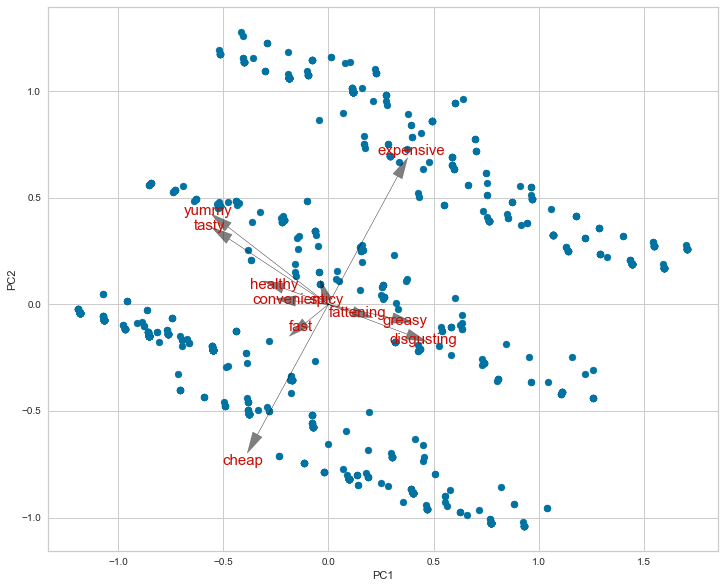

In [12]:
load_mat2 = loadings_matrix[['PC1', 'PC2']]

load_mat2

with mpl.rc_context({'figure.figsize': (12,10), 'font.size': 14}):
    plt.scatter(df_pca[:, 0], df_pca[:, 1])
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    for i, feature in enumerate(df.columns[:11]):
        plt.arrow(0, 0, load_mat2.values[i, 0], load_mat2.values[i, 1], color='black', alpha=0.5, head_width=0.05, head_length=0.1)
        plt.text(load_mat2.values[i, 0]*1.2, load_mat2.values[i, 1]*1.2, feature, color='r', ha='center', va='center', fontsize=15)
plt.show()

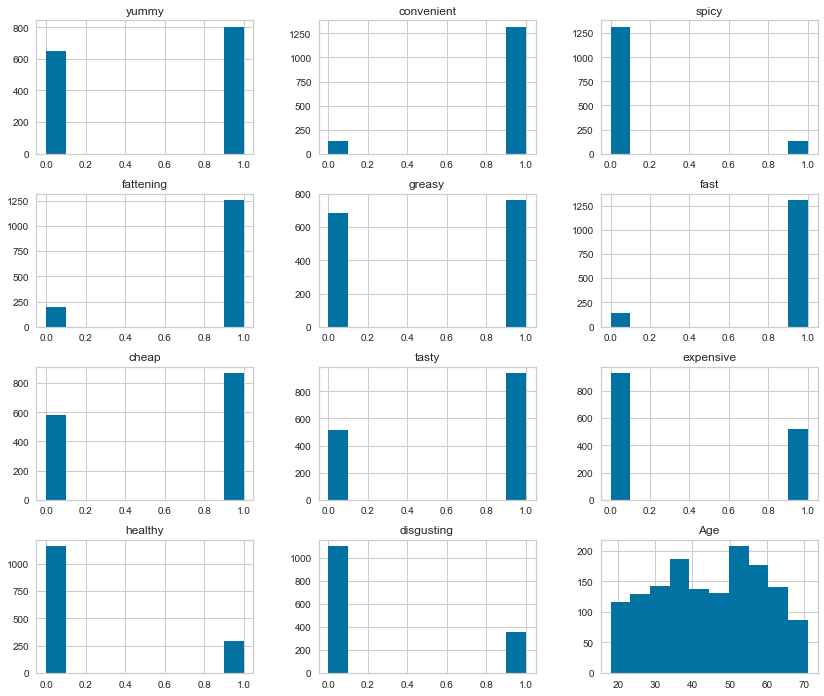

In [13]:
with mpl.rc_context({'figure.figsize': (14,12), 'font.size': 14}):
    df.hist()
    plt.show()

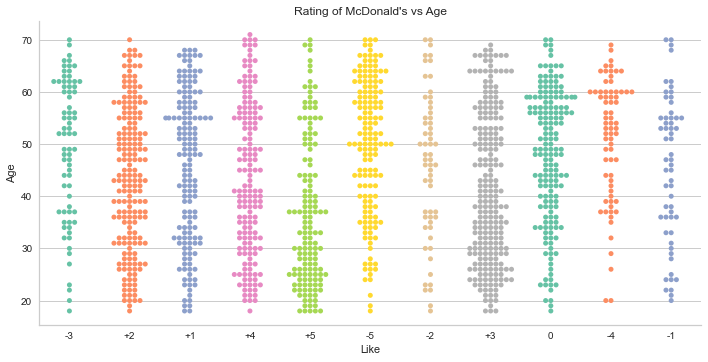

In [14]:
sns.catplot(x="Like", y="Age",data=df, 
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Rating of McDonald\'s vs Age')
plt.show()

# Extracting Segments

Scree plot

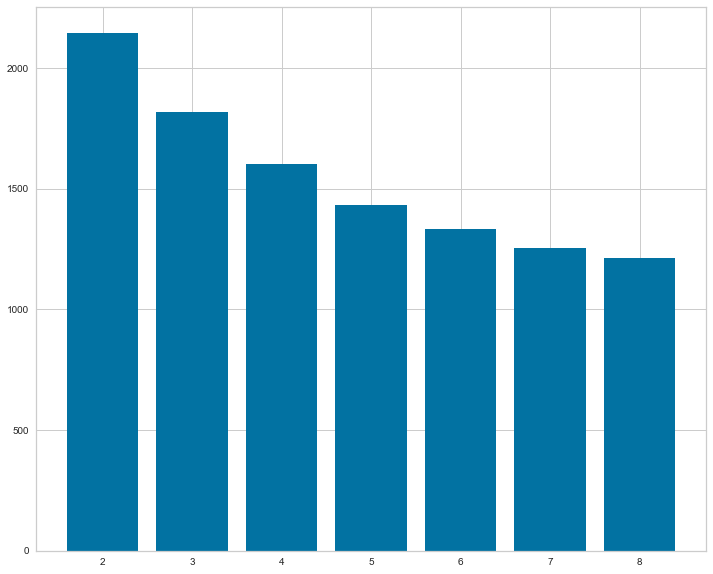

In [15]:
from sklearn.cluster import KMeans

k_vals = range(2, 9)

cols = df.columns[:11]

df_main = df[cols]

wcss = []
for k in k_vals:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_main)
    wcss.append(kmeans.inertia_)

with mpl.rc_context({'figure.figsize': (12,10), 'font.size': 14}):
    plt.bar(k_vals, wcss)

#### Using the elbow method to estimate the optimal value of number of clusters. 

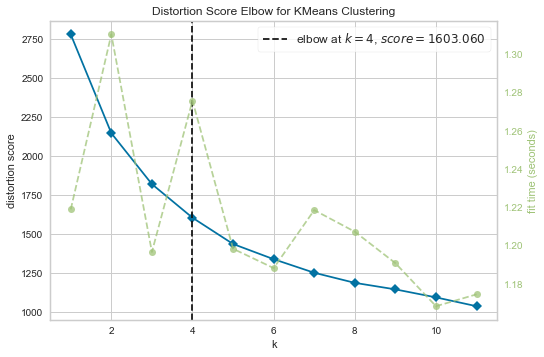

In [16]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,12)).fit(df_main)
visualizer.show();

#### Implementing the k-means clustering algorithm

In [17]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_main)
df['cluster_num'] = kmeans.labels_ #adding to df 

# checking each cluster size
print(Counter(kmeans.labels_))

Counter({1: 580, 0: 323, 2: 304, 3: 246})


### Visualising the clusters

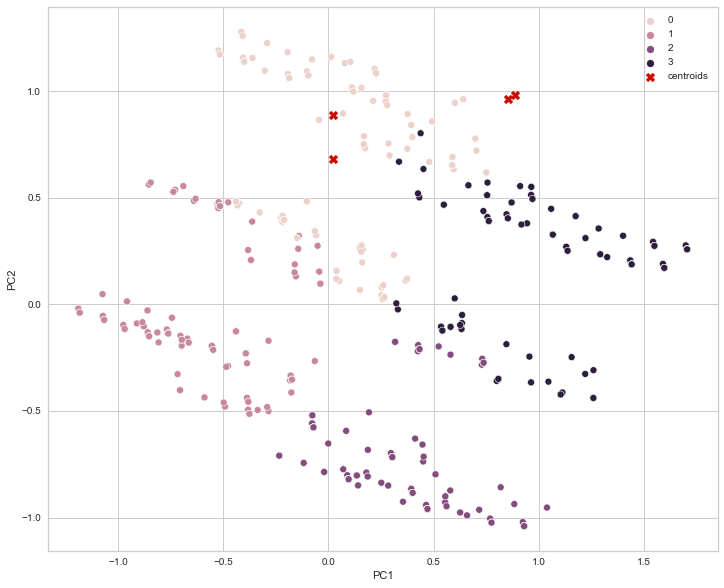

In [18]:
pf = pd.DataFrame(data=df_pca, columns=pca_cols)

#Visulazing clusters
with mpl.rc_context({'figure.figsize': (12,10), 'font.size': 14}):
    sns.scatterplot(data=pf, x="PC1", y="PC2", hue=kmeans.labels_)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
                marker="X", c="r", s=80, label="centroids")
    plt.legend()
    plt.show()

### Mosaic Plot showing people who have given different ratings to the company in each cluster.

In [19]:
crosstab =pd.crosstab(df['cluster_num'],df['Like'])
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]

with mpl.rc_context({'figure.figsize': (14,10), 'font.size': 14}):
    mosaic(crosstab.stack())
    plt.show()

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


### Mosaic Plot showing gender distribution in each cluster.

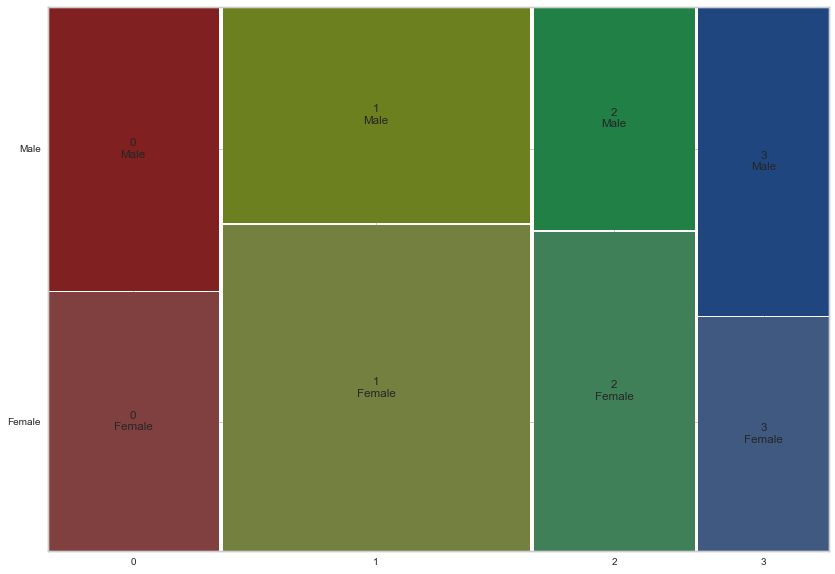

In [26]:
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])

with mpl.rc_context({'figure.figsize': (14,10), 'font.size': 14}):
    mosaic(crosstab_gender.stack())
    plt.show()